 # Perkembangan Kuota Jemaah Haji Menurut Provinsi

### Nama Kelompok

Akbar
Afifah
Dinda

### Import Library

In [97]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from modsim import *
import matplotlib.animation as animation
import folium
from folium import plugins
from sklearn.linear_model import LinearRegression


### Pengambilan Data dari CSV

In [98]:
data = pd.read_csv("Perkembangan Kuota Jemaah Haji Menurut Provinsi.csv")
data

,provinsi,jumlah,tahun
0,Aceh,1.999,2022
1,Sumatera Utara,3.802,2022
2,Sumatera Barat,2.106,2022
3,Riau,2.304,2022
4,Jambi,1.328,2022
...,...,...,...
275,Maluku,569.000,2015
276,Maluku Utara,853.000,2015
277,Papua,853.000,2015
278,Papua Barat,569.000,2015


### Jumlah Per Provinsi

In [99]:
Input = "Jawa Timur"
data = pd.read_csv("Perkembangan Kuota Jemaah Haji Menurut Provinsi.csv")
hasil = data[data['provinsi'] == 'Jawa Timur']
hasil

,provinsi,jumlah,tahun
14,Jawa Timur,16.048,2022
49,Jawa Timur,0.000,2021
84,Jawa Timur,35.152,2020
119,Jawa Timur,35.706,2019
154,Jawa Timur,35.270,2018
189,Jawa Timur,35.270,2017
224,Jawa Timur,27.323,2016
259,Jawa Timur,27.323,2015


### Time Series

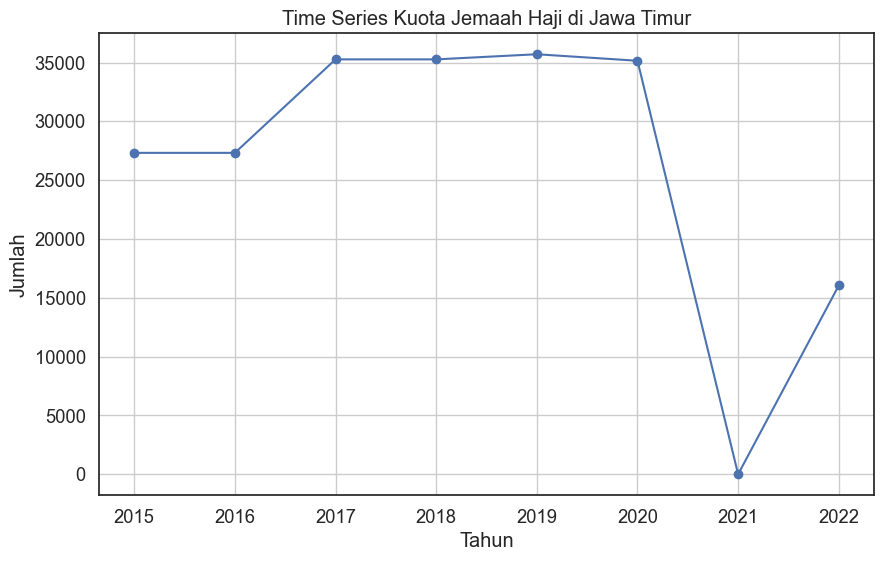

In [100]:
plt.figure(figsize=(10, 6))
plt.plot(hasil['tahun'], hasil['jumlah'] * 1000, marker='o')
plt.title('Time Series Kuota Jemaah Haji di {}'.format(Input))
plt.xlabel('Tahun')
plt.ylabel('Jumlah')
plt.grid(True)
plt.show()

### Sweep Series

In [101]:
# masih kosong

### Pie Chart

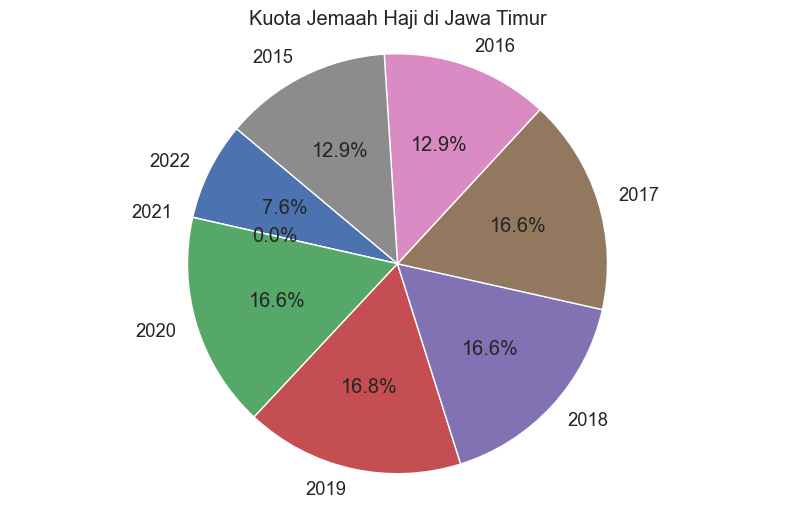

In [102]:
plt.figure(figsize=(10, 6))
plt.pie(hasil['jumlah'] * 1000, labels=hasil['tahun'], autopct='%1.1f%%', startangle=140)
plt.title('Kuota Jemaah Haji di {}'.format(Input))
plt.axis('equal')
plt.show()

## file csv map

In [103]:
class Lokasi:
    def __init__(self, nama, longitude, latitude):
        self.nama = nama
        self.longitude = longitude
        self.latitude = latitude

lokasi_objek = [
    Lokasi("Aceh", 95.3213, 4.6951),
    Lokasi("Sumatera Utara", 99.1332, 2.1151),
    Lokasi("Sumatera Barat", 100.4658, -0.9516),
    Lokasi("Riau", 101.6842, 0.5121),
    Lokasi("Jambi", 102.3481, -1.6177),
    Lokasi("Sumatera Selatan", 104.7458, -3.3199),
    Lokasi("Bengkulu", 102.2594, -3.5778),
    Lokasi("Lampung", 105.3333, -4.5586),
    Lokasi("Kepulauan Bangka Belitung", 105.9869, -2.7411),
    Lokasi("Kepulauan Riau", 108.2022, 3.9456),
    Lokasi("DKI Jakarta", 106.8456, -6.2088),
    Lokasi("Jawa Barat", 107.621, -6.9345),
    Lokasi("Jawa Tengah", 110.0649, -7.155),
    Lokasi("DI Yogyakarta", 110.4262, -7.7975),
    Lokasi("Jawa Timur", 112.7325, -7.7237),
    Lokasi("Banten", 106.1091, -6.4058),
    Lokasi("Bali", 115.0901, -8.3405),
    Lokasi("Nusa Tenggara Barat", 116.1165, -8.650),
    Lokasi("Nusa Tenggara Timur", 121.5722, -8.6574),
    Lokasi("Kalimantan Barat", 111.3426, -0.2787),
    Lokasi("Kalimantan Tengah", 113.4246, -1.6815),
    Lokasi("Kalimantan Selatan", 115.5363, -3.3194),
    Lokasi("Kalimantan Timur", 116.0375, -0.4786),
    Lokasi("Kalimantan Utara", 116.4233, 2.9932),
    Lokasi("Sulawesi Utara", 124.8484, 0.5015),
    Lokasi("Sulawesi Tengah", 121.4457, -1.43),
    Lokasi("Sulawesi Selatan", 120.1617, -4.6784),
    Lokasi("Sulawesi Tenggara", 122.0789, -4.1449),
    Lokasi("Gorontalo", 123.0595, 0.6999),
    Lokasi("Maluku", 128.1816, -3.2385),
    Lokasi("Maluku Utara", 127.8088, 0.7904),
    Lokasi("Papua Barat", 132.4675, -1.3361),
    Lokasi("Papua", 138.8334, -4.2699)
]


In [104]:
provinsi_input = Input

for lokasi in lokasi_objek:
    if lokasi.nama.lower() == provinsi_input.lower():
        print("Longitude:", lokasi.longitude)
        print("Latitude:", lokasi.latitude)
        break
else:
    print("Provinsi tidak ditemukan.")

Longitude: 112.7325
Latitude: -7.7237


In [105]:
provinsi_input = Input
# Mencari lokasi sesuai input
lokasi = None
for l in lokasi_objek:
    if l.nama.lower() == provinsi_input.lower():
        lokasi = l
        break

# Jika provinsi ditemukan, buat peta dan tambahkan marker
if lokasi:
    # Membuat peta dan menambahkan marker
    peta = folium.Map(location=[lokasi.latitude, lokasi.longitude], zoom_start=8)
    folium.Marker(location=[lokasi.latitude, lokasi.longitude], popup=lokasi.nama).add_to(peta)
    
    # Menampilkan peta
    peta
else:
    print("Provinsi tidak ditemukan.")

In [106]:
lokasi_awal = [lokasi.latitude, lokasi.longitude]

# Lokasi akhir
lokasi_akhir = [21.422510, 39.826168]

# Membuat peta dengan lokasi awal sebagai titik pusat
peta = folium.Map(location=lokasi_awal, zoom_start=3)

# Menambahkan marker untuk lokasi awal dan akhir
folium.Marker(lokasi_awal, popup=lokasi.nama).add_to(peta)
folium.Marker(lokasi_akhir, popup='Mekkah').add_to(peta)

# Menambahkan animasi pergerakan menggunakan AntPath
ant_path = plugins.AntPath(locations=[lokasi_awal, lokasi_akhir], delay=1000, color='blue')
ant_path.add_to(peta)

# Menampilkan peta
peta

In [108]:
# Filter data untuk provinsi Jawa Timur
data_jatim = data[data['provinsi'] == 'Jawa Timur']

# Ambil kolom tahun dan jumlah sebagai fitur dan target
tahun = data_jatim['tahun'].values.reshape(-1, 1)
jumlah = data_jatim['jumlah'].values

# Inisialisasi model regresi linier
model = LinearRegression()

# Melatih model
model.fit(tahun, jumlah)

# Prediksi untuk tahun 2022-2027
tahun_prediksi = np.array([[2022], [2023], [2024], [2025], [2026], [2027]])
prediksi = model.predict(tahun_prediksi)

# Tampilkan hasil prediksi
for i, tahun in enumerate(range(2022, 2028)):
    print(f"Tahun {tahun}: Prediksi Jumlah Jemaah Haji = {prediksi[i]}")

Tahun 2022: Prediksi Jumlah Jemaah Haji = 17.534083333333
Tahun 2023: Prediksi Jumlah Jemaah Haji = 14.969107142856956
Tahun 2024: Prediksi Jumlah Jemaah Haji = 12.40413095238091
Tahun 2025: Prediksi Jumlah Jemaah Haji = 9.839154761904865
Tahun 2026: Prediksi Jumlah Jemaah Haji = 7.27417857142882
Tahun 2027: Prediksi Jumlah Jemaah Haji = 4.709202380951865
